In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pypylon.pylon as py

In [2]:
camera = py.InstantCamera(py.TlFactory.GetInstance().CreateFirstDevice())
camera.Open()

In [5]:
print(camera.Width())
print(camera.Height())

5280
4600


camera.Close()

In [6]:
camera.Close()

In [94]:
camera = py.InstantCamera(py.TlFactory.GetInstance().CreateFirstDevice())
camera.Open()

# Print the model name of the camera.
print("Using device ", camera.GetDeviceInfo().GetModelName())

# demonstrate some feature access
new_width = camera.Width.Value - camera.Width.Inc
if new_width >= camera.Width.Min:
    camera.Width.Value = new_width

    # The parameter MaxNumBuffer can be used to control the count of buffers
    # allocated for grabbing. The default value of this parameter is 10.
    camera.MaxNumBuffer.Value = 5

    # Start the grabbing of c_countOfImagesToGrab images.
    # The camera device is parameterized with a default configuration which
    # sets up free-running continuous acquisition.
    camera.StartGrabbingMax(5)

    # Camera.StopGrabbing() is called automatically by the RetrieveResult() method
    # when c_countOfImagesToGrab images have been retrieved.
    while camera.IsGrabbing():
        # Wait for an image and then retrieve it. A timeout of 5000 ms is used.
        grabResult = camera.RetrieveResult(5000, py.TimeoutHandling_ThrowException)

        # Image grabbed successfully?
        if grabResult.GrabSucceeded():
            # Access the image data.
            print("SizeX: ", grabResult.Width)
            print("SizeY: ", grabResult.Height)
            img = grabResult.Array
            print("Gray value of first pixel: ", img[0, 0])
        else:
            print("Error: ", grabResult.ErrorCode, grabResult.ErrorDescription)
        grabResult.Release()
    camera.Close()


Using device  boA5328-100cm
SizeX:  5088
SizeY:  4600
Gray value of first pixel:  22
SizeX:  5088
SizeY:  4600
Gray value of first pixel:  16
SizeX:  5088
SizeY:  4600
Gray value of first pixel:  11
SizeX:  5088
SizeY:  4600
Gray value of first pixel:  20
SizeX:  5088
SizeY:  4600
Gray value of first pixel:  11


In [76]:
mycam2 = py.InstantCamera(tlf.CreateDevice())

TypeError: Wrong number or type of arguments for overloaded function 'TlFactory_CreateDevice'.
  Possible C/C++ prototypes are:
    Pylon::CTlFactory::CreateDevice(Pylon::CDeviceInfo const &)
    Pylon::CTlFactory::CreateDevice(Pylon::CDeviceInfo const &,Pylon::StringList_t const &)
    Pylon::CTlFactory::CreateDevice(Pylon::String_t const &)


In [71]:
mycam.IsGrabbing()

False

In [69]:
for d in devices:
    print(d.GetModelName(), d.GetSerialNumber())

boA5328-100cm 40351912


In [74]:
# mycam = py.InstantCamera(tlf.CreateDevice(devices[0])) #this is if one has multiple devices
mycam = py.InstantCamera(tlf.CreateFirstDevice()) #this will open the first enumerated device
mycam.Open() #this instantiates the device, activates comms, loads all the defaults.
mycam.UserSetSelector = "Default"
mycam.UserSetLoad.Execute()
mycam.PixelFormat = "Mono10"
mycam.StartGrabbing(py.GrabStrategy_LatestImageOnly)

RuntimeException: Cannot provide XML file. GenTL device is in use. : RuntimeException thrown (file 'PylonGtcTL.cpp', line 299)

In [63]:
def testgrab():
       if mycam.IsGrabbing: 
            res = self.mycam.RetrieveResult(5000, py.TimeOutHandling_ThrowException)
            if res.GrabSucceded():
                img = res.Array
            res.Release()
""" img_sum = np.zeros((mycam.Height(), mycam.Width()), dtype = np.uint16)
    if not mycam.IsGrabbing():
        mycam.StartGrabbingMax(py.GrabStrategy_LatestImageOnly)
    if mycam.IsGrabbing():
        with mycam.RetrieveResult(1000) as res:
            if res.GrabSucceeded(): 
                img = res.GetArray()
                img_sum += img
            else: """
                raise RuntimeError("Grab Failed")
        mycam.StopGrabbing()
    return img

In [64]:
test = testgrab()
plt.imshow(test)

RuntimeException: Failed to start acquisition. Error: Acquisition couldn't be started. Fg_AcquireEx failed (FG_Error -2090: Frame grabber already started) (fffffc17) : RuntimeException thrown (file 'PylonGtcStream.cpp', line 723)

In [24]:
mycam.Close()

In [17]:
mycam.Gain.GetValue() 
mycam.Gain.Value #these 2 are equivalent, the bottom one is more pythonic

0.0

In [18]:
mycam.Gain.SetValue(12.1)

In [19]:
mycam.Gain = 12.1

Again, these 2 are equivalent, the first one is C++,the bottom one is python. 

In [20]:
mycam.TriggerSelector.Symbolics

('FrameBurstStart',
 'FrameBurstEnd',
 'FrameBurstActive',
 'FrameStart',
 'FrameEnd',
 'FrameActive',
 'ExposureStart',
 'ExposureEnd',
 'ExposureActive')

In [8]:
mycam.UserSetSelector = "Default"
mycam.UserSetLoad.Execute()

AccessException: Node is not writable : AccessException thrown in node 'UserSetSelector' while calling 'UserSetSelector.FromString()' (file 'ValueT.h', line 85)

these last linee are for making sure that the camera has all the Default values. They should appear on top of every script

In [22]:
mycam.PixelFormat.Symbolics

('Mono8', 'Mono10', 'Mono12')

In [24]:
mycam.PixelFormat = "Mono10"

In [25]:
res = mycam.GrabOne(1000)

In [26]:
img = res.GetArray()

Previous line can be abbreviated into:

img = res.Array

In [27]:
img

array([[209, 206, 207, ..., 210, 225, 209],
       [212, 215, 206, ..., 221, 213, 216],
       [204, 218, 202, ..., 212, 221, 207],
       ...,
       [208, 215, 216, ..., 222, 211, 216],
       [207, 205, 215, ..., 217, 219, 227],
       [201, 208, 212, ..., 216, 215, 218]], dtype=uint16)

In [28]:
img.shape

(4600, 5280)

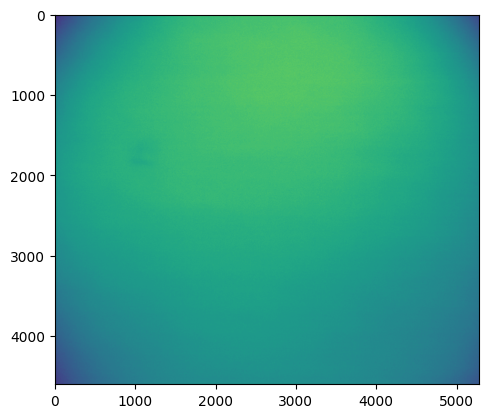

In [30]:
plt.imshow(img)

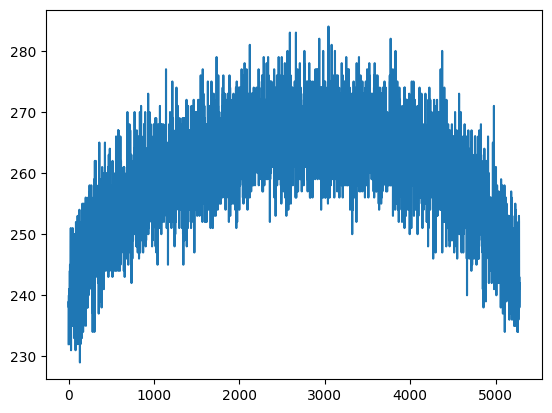

In [31]:
plt.plot(img[1000,:])

In [32]:
mycam.Close()

In [33]:
cam2 = py.InstantCamera(py.TlFactory.GetInstance().CreateFirstDevice())
cam2.Open()

In [35]:
cam2.UserSetSelector = "Default"
cam2.UserSetLoad.Execute()

cam2.ExposureTime = cam2.ExposureTime.Min

In [38]:
cam2.ExposureTime()

12.0

In [41]:
cam2.ResultingFrameRate.Value 

25.63116749967961

This is the FPS value when the camera has an exposure time of 12 microseconds ( the unit was discovered in Pylon Viewer)

In [42]:
1 / cam2.ResultingFrameRate.Value * 1e6

39015.0

In [45]:
cam2.ExposureMode()

'Timed'

In [50]:
cam2.BslExposureTimeMode.Symbolics

('Standard', 'UltraShort')

if Standard is selected, then cam.ExposureTime is by default 12 microseconds. 
If Ultrashor is selected, then cam.ExposureTime can be set to either 1 or 2 microseconds. 

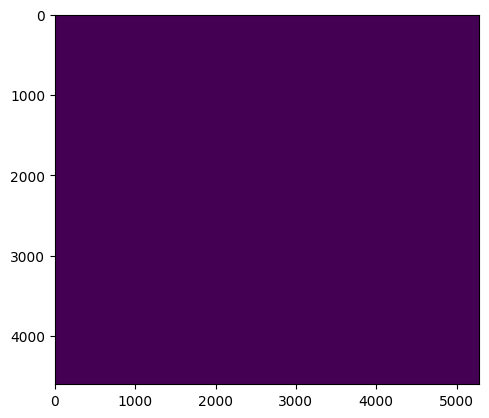

In [56]:
cam2.BslExposureTimeMode = "UltraShort"
res = cam2.GrabOne(1000)
img = res.Array
plt.imshow(img)

In [59]:
cam2.AcquisitionFrameRate()

100.0

In [54]:
cam2.BslExposureTimeMode = "Standard"

In [57]:
img

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [60]:
np.array (8,5)

TypeError: Cannot interpret '5' as a data type

In [61]:
alan = np.array([9,6])

In [62]:
alan

array([9, 6])

In [63]:
alan[0]

9